In [26]:
# loaddata directly from keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Keras data format is "#samples, #rows, #cols, #depth": as mnist loaded as just (28,28) images - we need to add "depth" dimension manually

In [27]:
image_rows, image_cols = x_train[0].shape
x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1)
x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)

In [28]:
input_shape = (image_rows, image_cols, 1)

Normalizing data, e.g. changing values range from (0, 255) to (0, 1)

In [29]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.shape

(60000, 28, 28, 1)

One-Hot encode labels

In [30]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

Build model

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

Train model

In [33]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test acc.", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2943 - accuracy: 0.9125 - val_loss: 0.1415 - val_accuracy: 0.9567
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2205 - accuracy: 0.9346 - val_loss: 0.1037 - val_accuracy: 0.9679
Epoch 3/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1734 - accuracy: 0.9488 - val_loss: 0.0849 - val_accuracy: 0.9744
Epoch 4/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1444 - accuracy: 0.9572 - val_loss: 0.0685 - val_accuracy: 0.9790
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1232 - accuracy: 0.9635 - val_loss: 0.0586 - val_accuracy: 0.9806
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.0546 - val_accuracy: 0.9819
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/st

Plot results

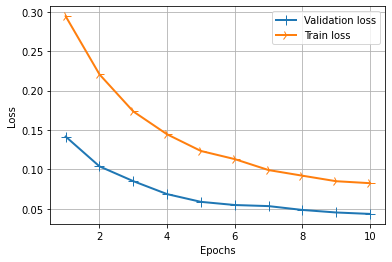

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 11)
line1 = plt.plot(epochs, val_loss_values, label="Validation loss")
line2 = plt.plot(epochs, loss_values, label="Train loss")
plt.setp(line1, linewidth=2.0, marker='+', markersize=10)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

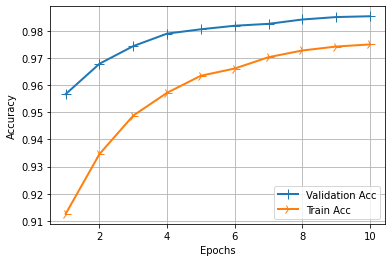

In [37]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, 11)
line1 = plt.plot(epochs, val_loss_values, label="Validation Acc")
line2 = plt.plot(epochs, loss_values, label="Train Acc")
plt.setp(line1, linewidth=2.0, marker='+', markersize=10)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

Save trained model

In [38]:
model.save("mnist.h5")